# Préparation des données

## Importations

In [24]:
import numpy as np # Pour les calculs mathématiques
import matplotlib.pyplot as plt # Pour les graphiques
import pandas as pd # Pour la manipulation de tableaux de données

import scipy.stats as scy # Pour les lois de probabilités et des tests statistiques
import itertools
import statsmodels.api as sm

from statsmodels.api import OLS # Pour la régression linéaire (avec statsmodels)
from statsmodels.stats.outliers_influence import variance_inflation_factor # Pour les VIF
from statsmodels.tools.tools import add_constant # Pour l'ajout d'une constante dans statsmodels
from statsmodels.stats.api import het_breuschpagan # Pour le test de Breusch-Pagan

from sklearn.linear_model import LinearRegression # Pour la régression linéaire (avec sklearn)
from sklearn.preprocessing import PolynomialFeatures # Pour le "feature engineering" polynomial
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Pour les critères d'erreur

In [25]:
train = pd.read_csv('Data/train_data.csv')

## Comprendre les données

### Statistiques Descriptives Univariées

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147 entries, 0 to 17146
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      17147 non-null  int64  
 1   date                    17147 non-null  object 
 2   prix                    17147 non-null  int64  
 3   nb_chambres             17147 non-null  int64  
 4   nb_sdb                  17147 non-null  float64
 5   m2_interieur            17147 non-null  float64
 6   m2_jardin               17147 non-null  float64
 7   m2_etage                17147 non-null  float64
 8   m2_soussol              17147 non-null  float64
 9   nb_etages               17147 non-null  float64
 10  vue_mer                 17147 non-null  int64  
 11  vue_note                17147 non-null  int64  
 12  etat_note               17147 non-null  int64  
 13  design_note             17147 non-null  int64  
 14  annee_construction      17147 non-null

In [27]:
train.shape

(17147, 21)

In [28]:
train.head()

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
0,4443800785,2014-11-21T00:00:00Z,481000,2,1.00,150.501672,360.460795,85.470085,65.031587,1.0,...,0,4,7,1924,0,123.560015,360.460795,98117,47.6855,-122.391
1,2722059013,2015-02-04T00:00:00Z,550000,2,1.00,117.985879,4046.822742,117.985879,0.000000,1.0,...,0,4,5,1908,0,173.727239,646.599777,98042,47.3651,-122.165
2,8856004730,2014-09-17T00:00:00Z,199950,2,2.75,147.714604,1943.236715,147.714604,0.000000,1.5,...,0,3,5,1920,0,121.701970,557.413601,98001,47.2786,-122.250
3,2473003210,2015-03-13T00:00:00Z,364808,3,1.75,215.533259,731.605351,150.501672,65.031587,1.0,...,0,3,8,1967,0,184.875511,903.010033,98058,47.4524,-122.146
4,6743700335,2014-06-04T00:00:00Z,470000,3,2.00,167.224080,1176.978818,167.224080,0.000000,1.0,...,0,3,7,1956,1990,183.017466,908.119658,98033,47.6935,-122.173


In [29]:
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,17147.0,NaN,NaN,NaN,4605474711.841722,2879726234.50155,1000102.0,2126059294.5,3905120330.0,7339451560.0,9900000190.0
date,17147,369,2014-06-23T00:00:00Z,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prix,17147.0,NaN,NaN,NaN,543193.928034,371608.733909,75000.0,323000.0,450000.0,646000.0,7062500.0
nb_chambres,17147.0,NaN,NaN,NaN,3.371669,0.932029,0.0,3.0,3.0,4.0,33.0
nb_sdb,17147.0,NaN,NaN,NaN,2.12301,0.772906,0.0,1.75,2.25,2.5,7.75
m2_interieur,17147.0,NaN,NaN,NaN,193.732114,85.587837,26.941657,132.850242,178.372352,236.90078,932.738759
m2_jardin,17147.0,NaN,NaN,NaN,1411.998121,3879.062125,48.309179,468.227425,706.15013,992.985879,153414.994426
m2_etage,17147.0,NaN,NaN,NaN,166.652667,77.312579,26.941657,111.48272,145.856559,206.243032,823.114084
m2_soussol,17147.0,NaN,NaN,NaN,27.079448,41.221029,0.0,0.0,0.0,52.025269,447.788926
nb_etages,17147.0,NaN,NaN,NaN,1.497638,0.542015,1.0,1.0,1.5,2.0,3.5


In [30]:
oldest_date = train['date'].min()
newest_date = train['date'].max()

print("Oldest date:", oldest_date)
print("Newest date:", newest_date)

Oldest date: 2014-05-02T00:00:00Z
Newest date: 2015-05-27T00:00:00Z


#### Boîtes à Moustaches

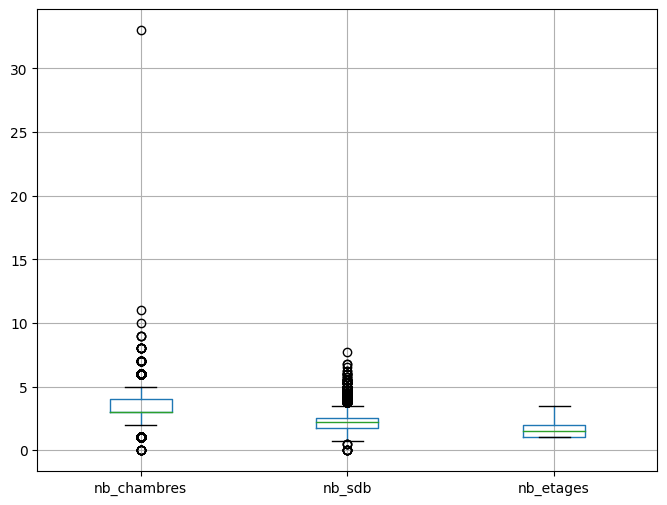

In [31]:
train_rooms = train[['nb_chambres', 'nb_sdb', 'nb_etages']]
plt.subplots(figsize=(8, 6))
train_rooms.boxplot()
plt.show()

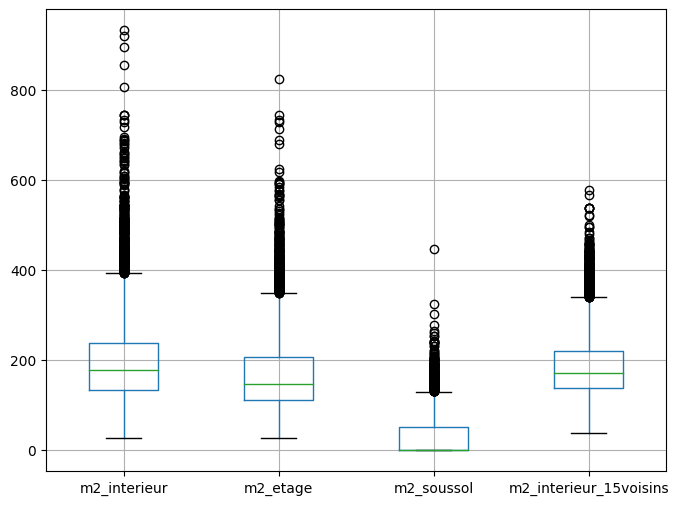

In [32]:
train_m2int = train[['m2_interieur', 'm2_etage','m2_soussol','m2_interieur_15voisins']]
plt.subplots(figsize=(8, 6))
train_m2int.boxplot()
plt.show()

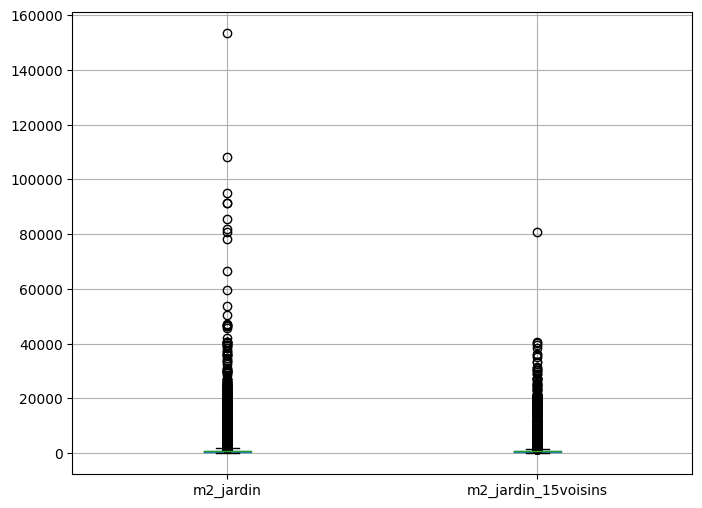

In [33]:
train_m2ext = train[['m2_jardin', 'm2_jardin_15voisins']]
plt.subplots(figsize=(8, 6))
train_m2ext.boxplot()
plt.show()

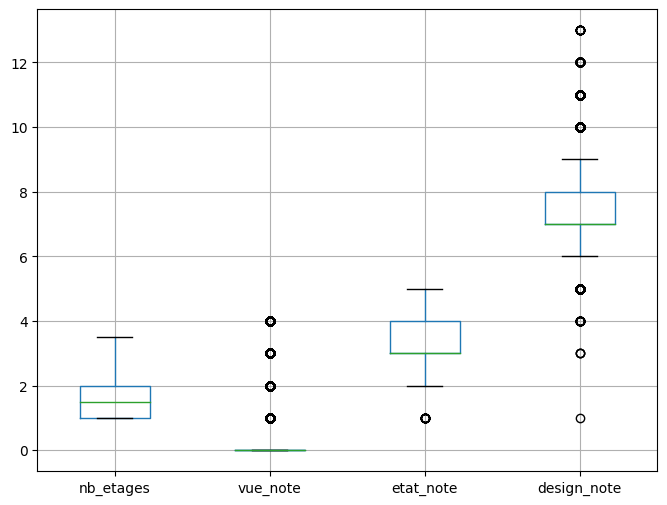

In [34]:
train_etages_notes = train[['nb_etages', 'vue_note', 'etat_note', 'design_note']]
plt.subplots(figsize=(8, 6))
train_etages_notes.boxplot()
plt.show()

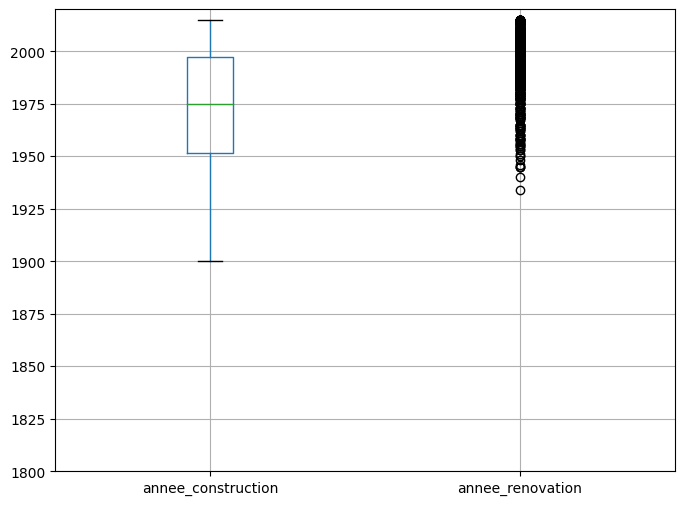

In [35]:
train_constr = train[['annee_construction', 'annee_renovation']]
plt.subplots(figsize=(8, 6))
train_constr.boxplot()
plt.ylim(1800, 2020)
plt.show()

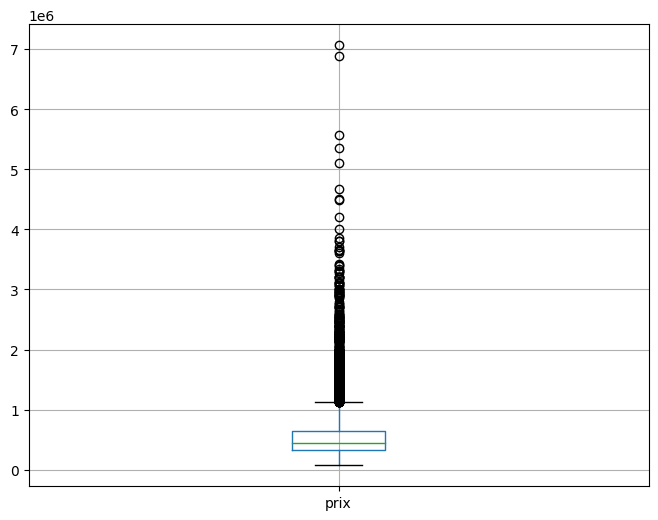

In [36]:
train_prix = train[['prix']]
plt.subplots(figsize=(8, 6))
train_prix.boxplot()
plt.show()

#### Influence de certains facteurs sur le prix

Prix moyen vue mer : 1636480.7391304348
Prix moyen sans vue mer : 534323.7075665824


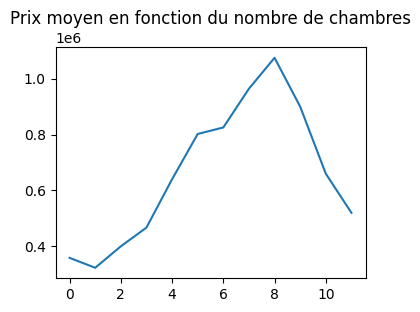

In [37]:
# influence de la vue sur la mer

print("Prix moyen vue mer :", train[train.vue_mer==1].prix.mean())
print("Prix moyen sans vue mer :", train[train.vue_mer==0].prix.mean())

# influence du nombre de chambres

prix_chambres = []
for nb_chambre in range(train['nb_chambres'].min(), 12):
    prix_chambres.append(train[train.nb_chambres==nb_chambre].prix.mean())
plt.subplots(figsize=(4, 3))
plt.plot(range(train['nb_chambres'].min(), 12), prix_chambres)
plt.title('Prix moyen en fonction du nombre de chambres')
plt.show()

### Statistiques Descriptives Bi-variées

In [38]:
train_corr =train.drop(columns=['id', 'date'])
round(train_corr.corr(), 2)

,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
prix,1.00,0.31,0.53,0.70,0.09,0.61,0.32,0.25,0.27,0.40,0.03,0.67,0.05,0.13,0.58,0.08,-0.05,0.31,0.02
nb_chambres,0.31,1.00,0.52,0.58,0.03,0.47,0.31,0.17,-0.01,0.08,0.03,0.36,0.15,0.03,0.39,0.03,-0.16,-0.01,0.13
nb_sdb,0.53,0.52,1.00,0.75,0.08,0.68,0.28,0.50,0.06,0.19,-0.13,0.67,0.51,0.05,0.57,0.08,-0.20,0.02,0.22
m2_interieur,0.70,0.58,0.75,1.00,0.17,0.88,0.43,0.35,0.10,0.28,-0.07,0.77,0.32,0.06,0.76,0.18,-0.20,0.05,0.24
m2_jardin,0.09,0.03,0.08,0.17,1.00,0.18,0.02,-0.01,0.02,0.07,-0.01,0.11,0.05,0.00,0.15,0.70,-0.13,-0.08,0.23
m2_etage,0.61,0.47,0.68,0.88,0.18,1.00,-0.06,0.52,0.07,0.17,-0.16,0.76,0.42,0.02,0.73,0.19,-0.26,-0.00,0.34
m2_soussol,0.32,0.31,0.28,0.43,0.02,-0.06,1.00,-0.25,0.08,0.27,0.17,0.17,-0.13,0.08,0.20,0.02,0.08,0.11,-0.15
nb_etages,0.25,0.17,0.50,0.35,-0.01,0.52,-0.25,1.00,0.02,0.03,-0.27,0.46,0.49,0.00,0.28,-0.01,-0.06,0.05,0.12
vue_mer,0.27,-0.01,0.06,0.10,0.02,0.07,0.08,0.02,1.00,0.42,0.02,0.08,-0.03,0.10,0.08,0.03,0.04,-0.01,-0.04
vue_note,0.40,0.08,0.19,0.28,0.07,0.17,0.27,0.03,0.42,1.00,0.05,0.25,-0.06,0.10,0.28,0.07,0.09,0.01,-0.08


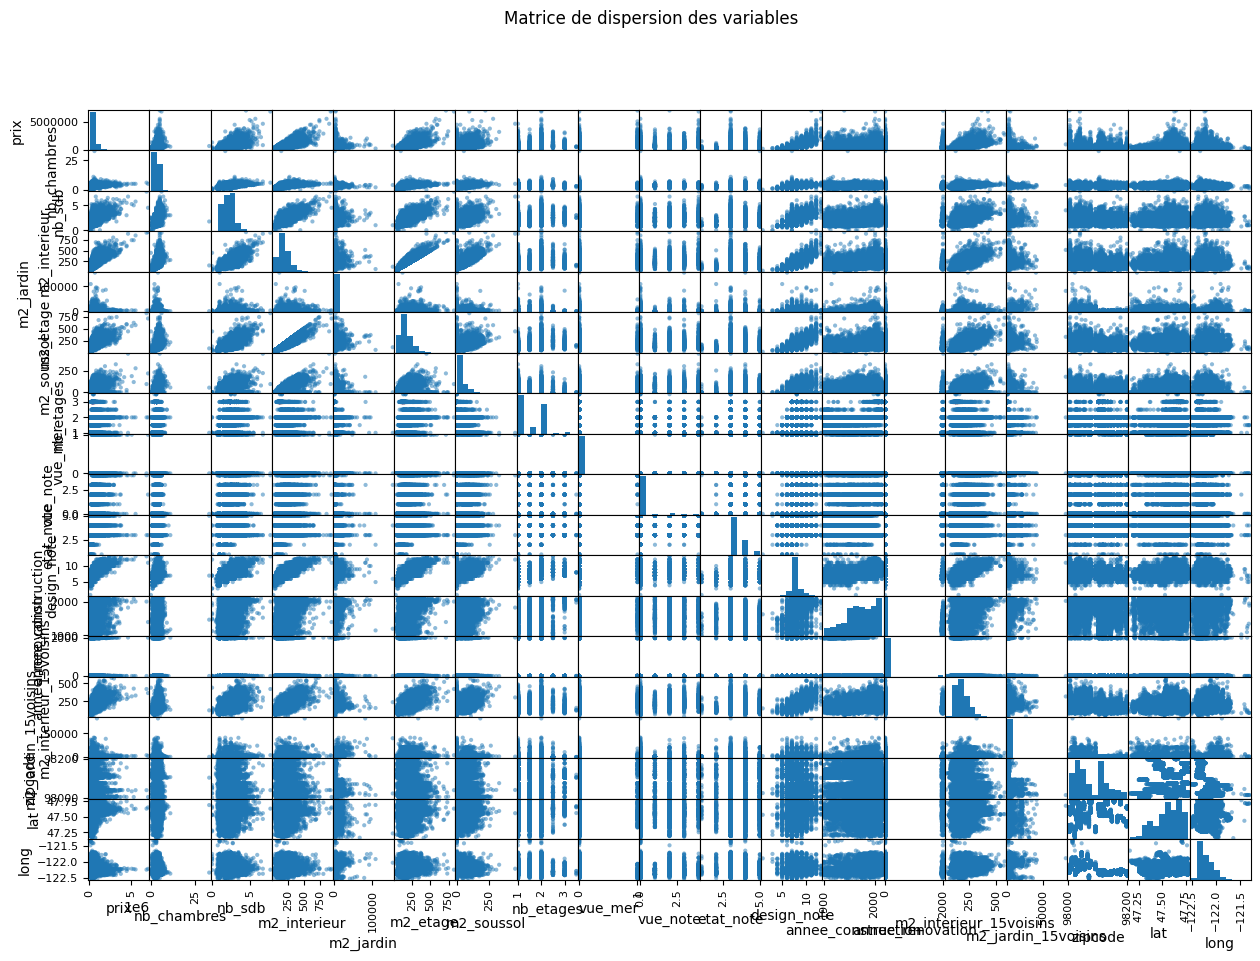

In [39]:
pd.plotting.scatter_matrix(train_corr, figsize=(15,10))
plt.suptitle("Matrice de dispersion des variables")

plt.show()

## Nettoyage des Données

In [40]:
raw_train = train.copy()
taille_initiale = len(raw_train)

def perte(set):
    prop_perte = (taille_initiale - len(set)) / taille_initiale
    print("Perte actuelle de", round(prop_perte*100, 2), "%")

### Missing values

In [41]:
## Missing or zero values and percentage

# arguments qui doivent avoir une valeur non nulle
arguments1 = ["prix", "nb_chambres", "nb_sdb", "m2_interieur", "nb_etages", "vue_note", "etat_note", "design_note", "annee_construction", "m2_interieur_15voisins", "zipcode", "lat", "long"]

# arguments qui peuvent avoir une valeur nulle
arguments2 = ["m2_jardin", "m2_etage", "m2_soussol", "vue_mer", "annee_renovation", "m2_jardin_15voisins"]


for argument in arguments1:
    manquant = train[argument].isna().sum()+train[argument].isin([0]).sum()

    print("\033[1m\033[4m", argument, "\033[0m")
    print("Nombre de valeurs manquantes ou nulles pour", argument, ":", manquant)
    print("Propotion de valeurs manquantes ou nulles pour", argument, ":", manquant/len(train)*100, "%")

for argument in arguments2:
    manquant = train[argument].isna().sum()

    print("\033[1m\033[4m", argument, "\033[0m")
    print("Nombre de valeurs manquantes pour", argument, ":", manquant)
    print("Propotion de valeurs manquantes pour", argument, ":", manquant/len(train)*100, "%")

 prix 
Nombre de valeurs manquantes ou nulles pour prix : 0
Propotion de valeurs manquantes ou nulles pour prix : 0.0 %
 nb_chambres 
Nombre de valeurs manquantes ou nulles pour nb_chambres : 9
Propotion de valeurs manquantes ou nulles pour nb_chambres : 0.05248731556540502 %
 nb_sdb 
Nombre de valeurs manquantes ou nulles pour nb_sdb : 7
Propotion de valeurs manquantes ou nulles pour nb_sdb : 0.04082346766198169 %
 m2_interieur 
Nombre de valeurs manquantes ou nulles pour m2_interieur : 0
Propotion de valeurs manquantes ou nulles pour m2_interieur : 0.0 %
 nb_etages 
Nombre de valeurs manquantes ou nulles pour nb_etages : 0
Propotion de valeurs manquantes ou nulles pour nb_etages : 0.0 %
 vue_note 
Nombre de valeurs manquantes ou nulles pour vue_note : 15450
Propotion de valeurs manquantes ou nulles pour vue_note : 90.1032250539453 %
 etat_note 
Nombre de valeurs manquantes ou nulles pour etat_note : 0
Propotion de valeurs manquantes ou nulles pour etat_note : 0.0 %
 design_note 
Nomb

## REMARQUES (Erwann)

La valeur de 'vue_note' peut être 0 (d'après l'enoncé, la note varie de 0 à 4, contrairement à la note de etat_note qui elle va de 1 à 5). 

Donc à priori, seule les valeurs nulles doivent être remplacées par la moyenne. 
De plus, si elle devait être remplacé par une moyenne, cela devrait être la moyenne des notes "valide", donc il faudrait utiliser train['vue_note'].where(train['vue_note'] > 2).mean()

In [42]:
# Nb Chambres et Nb Sdb : on drop les valeurs abhérentes

train = train.dropna(subset=['nb_chambres']).loc[train['nb_chambres'] != 0] #on les drop car -5% sans données
train = train.dropna(subset=['nb_sdb']).loc[train['nb_sdb'] != 0] #on les drop car -5% sans données

# Pour vue note : on remplace par la moyenne des notes (il est incohérent d'avoir une vue à 0)

# train['vue_note'] = train['vue_note'].replace(0, train['vue_note'].mean())

perte(train)

train_universal_cleaning = train.copy()

Perte actuelle de 0.07 %


Même remarque qu'avant, vue_note devrait pouvoir être nulle

In [43]:
## Vérification du nettoyage des données

# arguments qui doivent avoir une valeur non nulle
arguments1 = ["prix", "nb_chambres", "nb_sdb", "m2_interieur", "nb_etages", "vue_note", "etat_note", "design_note", "annee_construction", "m2_interieur_15voisins", "zipcode", "lat", "long"]

# arguments qui peuvent avoir une valeur nulle
arguments2 = ["m2_jardin", "m2_etage", "m2_soussol", "vue_mer", "annee_renovation", "m2_jardin_15voisins"]


for argument in arguments1:
    manquant = train[argument].isna().sum()+train[argument].isin([0]).sum()
    if manquant != 0:
        print("Nettoyage des données non satisfaisant pour", argument)
    else:
        print("OK pour", argument)

for argument in arguments2:
    manquant = train[argument].isna().sum()
    if manquant != 0:
        print("Nettoyage des données non satisfaisant pour", argument)
    else:
        print("OK pour", argument)

OK pour prix
OK pour nb_chambres
OK pour nb_sdb
OK pour m2_interieur
OK pour nb_etages
Nettoyage des données non satisfaisant pour vue_note
OK pour etat_note
OK pour design_note
OK pour annee_construction
OK pour m2_interieur_15voisins
OK pour zipcode
OK pour lat
OK pour long
OK pour m2_jardin
OK pour m2_etage
OK pour m2_soussol
OK pour vue_mer
OK pour annee_renovation
OK pour m2_jardin_15voisins


#### Identification et suppression des outliers

La réduction de cardinalité n'est pas considérée ici car toutes les valeurs sont numériques (on ne va pas créer une catégorie >=6 chambres car à ce moment, par quelle valeur numérique la remplacer ?)

In [44]:
arguments = arguments1 + arguments2

for argument in arguments:
    print("\033[1m\033[4m", argument, "\033[0m")
    print(train[argument].value_counts())

 prix 
prix
350000     139
450000     137
425000     123
400000     122
550000     120
          ... 
278800       1
888550       1
1234570      1
1120280      1
605500       1
Name: count, Length: 3553, dtype: int64
 nb_chambres 
nb_chambres
3     7763
4     5481
2     2191
5     1288
6      208
1      158
7       31
8        9
9        3
10       1
11       1
33       1
Name: count, dtype: int64
 nb_sdb 
nb_sdb
2.50    4301
1.00    3047
1.75    2371
2.25    1617
2.00    1516
1.50    1124
2.75     932
3.00     611
3.50     597
3.25     492
3.75     131
4.00     107
4.50      76
4.25      70
0.75      57
4.75      21
5.00      19
5.25      11
1.25       9
5.50       9
6.00       5
5.75       3
0.50       3
6.25       2
6.75       2
6.50       1
7.75       1
Name: count, dtype: int64
 m2_interieur 
m2_interieur
133.779264    106
154.217763    105
120.772947    104
159.791899    104
130.063174    103
             ... 
355.629877      1
226.774433      1
116.313638      1
217.484207      

#### Méthode 1 - On supprime tous les outliers identifiés sans se soucier de la proportion de données perdues

In [45]:
#Catégorie Chambre

prop_sup_6_chambres = len(train[train['nb_chambres'] >= 6])/len(train)*100
print(prop_sup_6_chambres, "% des maisons ont plus de 6 chambres")

train = train.dropna(subset=['nb_chambres']).loc[train['nb_chambres'] < 6] #on les drop car -5% sans données

perte(train)

1.4823460752845055 % des maisons ont plus de 6 chambres
Perte actuelle de 1.55 %


In [46]:
# Catégorie SdB

nb_occurrences = train['nb_sdb'].value_counts()
count = sum(nb_occurrences[nb_occurrences <= 100])
print(count/len(train)*100, "% des maisons qui ont un nombre de salle de bain qui apparaît <=100 fois dans le jeu de données")

ids_less_than_100 = train[train['nb_sdb'].map(train['nb_sdb'].value_counts()) < 100]['id'].tolist()

train.loc[train['id'].isin(ids_less_than_100)].head()

#On drop ces ids
train = train.drop(train[train['id'].isin(ids_less_than_100)].index)

perte(train)

1.9667081334044192 % des maisons qui ont un nombre de salle de bain qui apparaît <=100 fois dans le jeu de données
Perte actuelle de 3.49 %


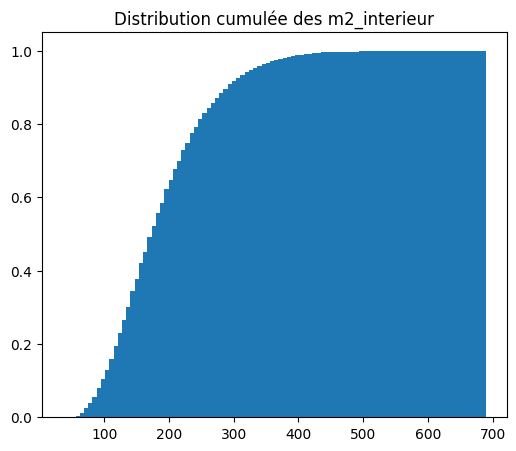

8.74977340020545 % des maisons ont un m2_interieur > 300
1.3173001389812073 % des maisons ont un m2_interieur > 400
Perte actuelle de 4.82 %


In [47]:
# Catégorie m2_interieur

#On rend ces données entières
train['m2_interieur'] = train['m2_interieur'].astype(int)

#On trace le graphique des m2_interieur cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_interieur'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_interieur')
plt.show()

# Proportion de maisons avec m2_interieur > 300
prop_sup_300 = len(train[train['m2_interieur'] > 300])/len(train)*100
print(prop_sup_300, "% des maisons ont un m2_interieur > 300")

#Proportion de maisons avec m2_interieur > 400
prop_sup_400 = len(train[train['m2_interieur'] > 400])/len(train)*100
print(prop_sup_400, "% des maisons ont un m2_interieur > 400")

#On drop les maisons avec m2_interieur > 400
train = train.drop(train[train['m2_interieur'] > 400].index)

#On drop les maisons avec m2_interieur < 50
train = train.drop(train[train['m2_interieur'] < 50].index)

perte(train)

In [48]:
# Catégorie nb_etages
prop_sup_3_etages = len(train[train['nb_etages'] > 3]) / len(train) * 100
print("Proportion of properties with more than 3 floors:", prop_sup_3_etages, "%")

train = train[train['nb_etages'] <= 3]

perte(train)

Proportion of properties with more than 3 floors: 0.030635377734207464 %
Perte actuelle de 4.85 %


In [49]:
#Catégorie vue_note : on ne touche à rien (peu de valeurs, pas de valeurs abhérentes)

In [50]:
# Catégorie etat_note

prop_etat_note_2 = len(train[train['etat_note'] <= 2]) / len(train) * 100
print("Proportion of etat_note <= 2:", prop_etat_note_2, "%")

#On drop ces valeurs
train = train[train['etat_note'] > 2]

perte(train)


Proportion of etat_note <= 2: 0.8886982103456729 %
Perte actuelle de 5.69 %


In [51]:
# Catégorie design_note

prop_design_note = len(train[(train['design_note'] >= 11) | (train['design_note'] <= 5)]) / len(train) * 100
print("Proportion of properties with design_note >= 11 or <= 5:", prop_design_note, "%")

#On drop ces valeurs
train = train[(train['design_note'] < 11) & (train['design_note'] > 5)]

perte(train)

Proportion of properties with design_note >= 11 or <= 5: 1.9850349390884918 %
Perte actuelle de 7.56 %


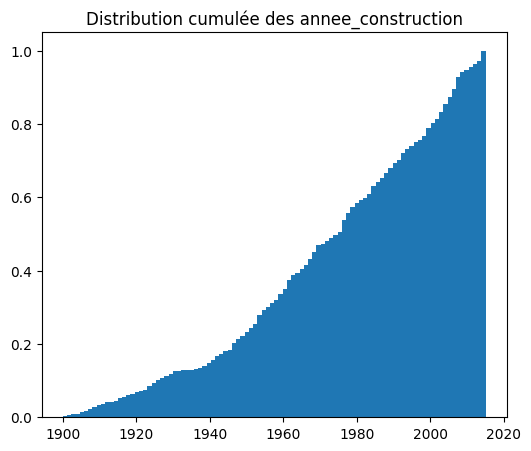

2.782334384858044 % des maisons ont été construites avant 1910


In [52]:
# Catégorie annee_construction

#On trace le graphique des annee_construction cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['annee_construction'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des annee_construction')
plt.show()

# Proportion des maisons construites avant 1910
prop_avant_1910 = len(train[train['annee_construction'] < 1910]) / len(train) * 100
print(prop_avant_1910, "% des maisons ont été construites avant 1910")

#On ne drop pas de valeurs


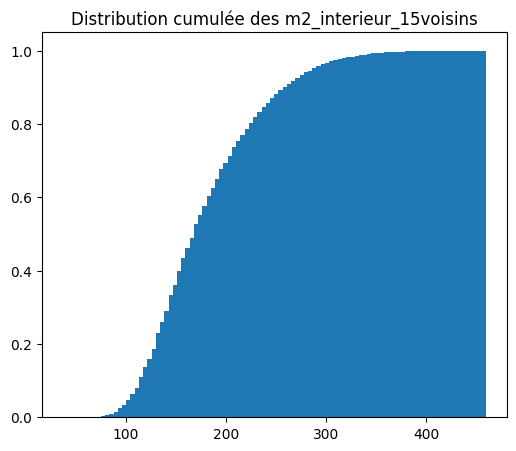

1.943217665615142 % des maisons ont un m2_interieur_15voisins > 325 ou < 75
Perte actuelle de 9.36 %


In [53]:
# Catégorie m2_interieur_15voisins

#On rend ces données entières
train['m2_interieur_15voisins'] = train['m2_interieur_15voisins'].astype(int)

#On trace le graphique des m2_interieur_15voisins cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_interieur_15voisins'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_interieur_15voisins')
plt.show()

# Proportion de maisons avec m2_interieur_15voisins > 325 ou < 75
prop_sup_325_ou_inf_75 = (len(train[train['m2_interieur_15voisins'] > 325]) + len(train[train['m2_interieur_15voisins'] < 75])) / len(train) * 100
print(prop_sup_325_ou_inf_75, "% des maisons ont un m2_interieur_15voisins > 325 ou < 75")

#On drop ces valeurs
train = train[(train['m2_interieur_15voisins'] <= 325) & (train['m2_interieur_15voisins'] >= 75)]

perte(train)


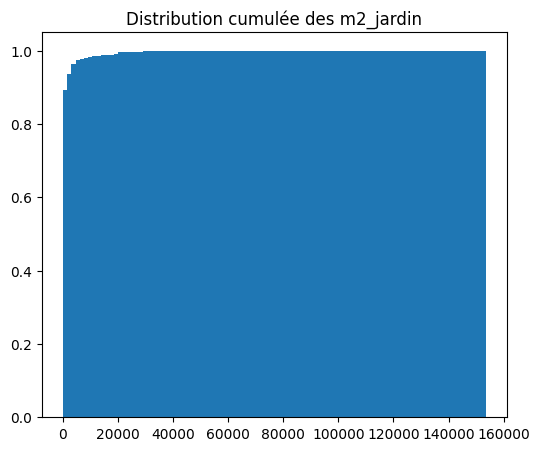

3.22352335606743 % des maisons ont un m2_jardin > 5000
Perte actuelle de 12.28 %


In [54]:
# Catégorie m2_jardin

#On rend ces données entières
train['m2_jardin'] = train['m2_jardin'].astype(int)

#On trace le graphique des m2_jardin cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_jardin'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_jardin')
plt.show()

# Proportion de maisons avec m2_jardin > 5000
taille_data = len(train)
prop_sup_5000 = len(train[train['m2_jardin'] > 5000]) / taille_data * 100
print(prop_sup_5000, "% des maisons ont un m2_jardin > 5000")

#On drop ces valeurs
train = train[train['m2_jardin'] <= 5000]

perte(train)


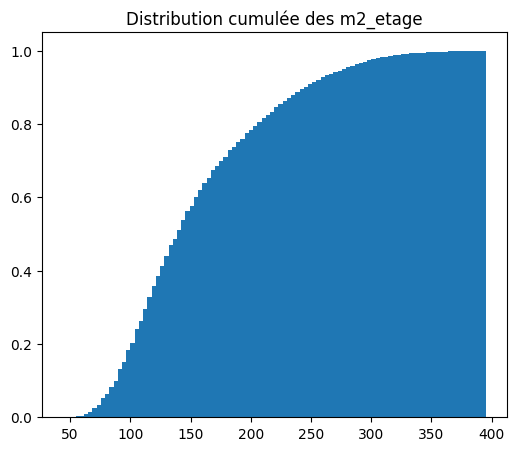

2.6261551758526696 % des maisons ont un m2_etage > 300 ou < 50
Perte actuelle de 14.59 %


In [55]:
# Catégorie m2_etage

#On rend ces données entières
train['m2_etage'] = train['m2_etage'].astype(int)

#On trace le graphique des m2_etage cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_etage'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_etage')
plt.show()

# Proportion de maisons avec m2_etage > 300 ou < 75
prop_sup_300_ou_inf_50 = (len(train[train['m2_etage'] > 300]) + len(train[train['m2_etage'] < 50])) / len(train) * 100
print(prop_sup_300_ou_inf_50, "% des maisons ont un m2_etage > 300 ou < 50")

#On drop ces valeurs
train = train[(train['m2_etage'] <= 300) & (train['m2_etage'] >= 50)]

perte(train)


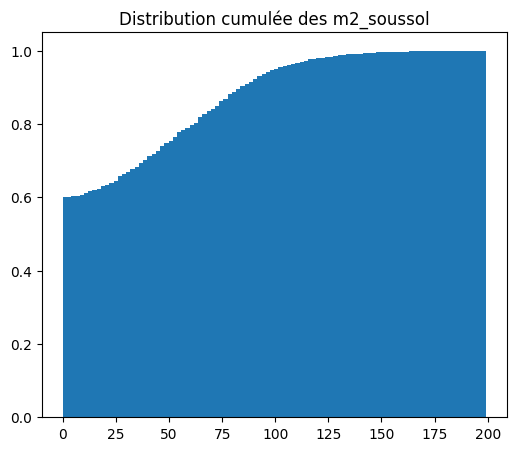

1.8025399426464563 % des maisons ont un m2_soussol > 125
Perte actuelle de 16.13 %


In [56]:
# Catégorie m2_soussol

#On rend ces données entières
train['m2_soussol'] = train['m2_soussol'].astype(int)

#On trace le graphique des m2_soussol cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_soussol'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_soussol')
plt.show()

# Proportion de maisons avec m2_soussol > 125
prop_sup_125 = len(train[train['m2_soussol'] > 125]) / len(train) * 100
print(prop_sup_125, "% des maisons ont un m2_soussol > 125")

#On drop ces valeurs
train = train[train['m2_soussol'] <= 125]

perte(train)

In [57]:
# Catégorie vue_mer : On ne change rien

95.91155611180643 % des maisons n'ont pas été rénovées


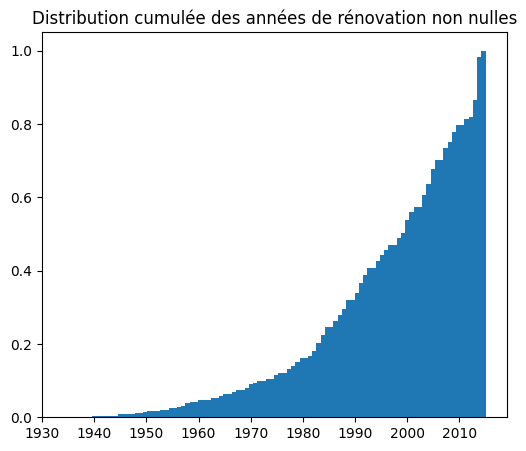

In [58]:
# Catégorie annee_renovation

# Proportion de maisons avec annee_renovation = 0
prop_annee_renovation_0 = len(train[train['annee_renovation'] == 0]) / len(train) * 100
print(prop_annee_renovation_0, "% des maisons n'ont pas été rénovées")

# On trace l'histogramme cumulé des années de rénovation non nulles
plt.subplots(figsize=(6, 5))
plt.hist(train[train['annee_renovation'] != 0]['annee_renovation'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des années de rénovation non nulles')
plt.show()

# On ne drop pas de valeurs

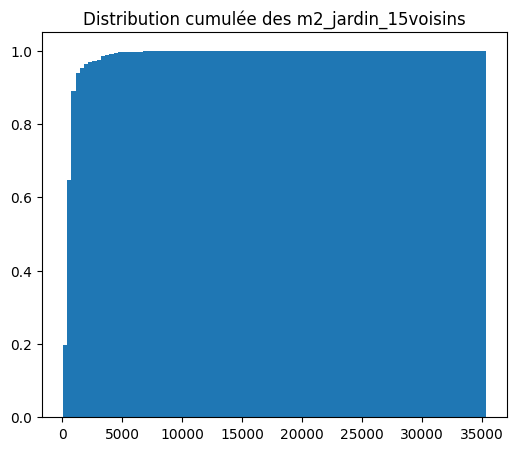

1.5714087053261023 % des maisons ont un m2_jardin_15voisins > 4000 ou < 100


In [59]:
# Catégorie m2_jardin_15voisins

#On rend ces données entières
train['m2_jardin_15voisins'] = train['m2_jardin_15voisins'].astype(int)

#On trace le graphique des m2_jardin_15voisins cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_jardin_15voisins'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_jardin_15voisins')
plt.show()

# Proportion de maisons avec m2_jardin_15voisins > 4000 ou < 100
prop_sup_4000_ou_inf_100 = (len(train[train['m2_jardin_15voisins'] > 4000]) + len(train[train['m2_jardin_15voisins'] < 100])) / len(train) * 100
print(prop_sup_4000_ou_inf_100, "% des maisons ont un m2_jardin_15voisins > 4000 ou < 100")

#On drop ces valeurs
train = train[(train['m2_jardin_15voisins'] <= 4000) & (train['m2_jardin_15voisins'] >= 100)]


In [60]:
# Perte finale de données

print("Perte finale de", round((taille_initiale - len(train))/taille_initiale*100, 2), "%")

Perte finale de 17.44 %


In [61]:
# Enregistrement des données

train_cleaned_1 = train.copy()     # données nettoyées
train = train_universal_cleaning   # retour aux données avant divergence des méthodes de nettoyage

#### Méthode 2 - On supprime les données les plus abhérentes en se limitant à 6% de perte sur l'ensemble du dataset

In [62]:
def cleaning_advancement(set):
    perte(set)
    nb_lignes_supprimees = taille_initiale - len(set)
    print(nb_lignes_supprimees, "lignes de données ont été supprimées")
    reste_a_nettoyer = round(taille_initiale*0.06) - nb_lignes_supprimees
    print("Il est encore possible d'enlever", reste_a_nettoyer, "lignes de données")

In [63]:
#Catégorie Chambre

prop_sup_7_chambres = len(train[train['nb_chambres'] >= 7])/len(train)*100
print(prop_sup_7_chambres, "% des maisons ont plus de 7 chambres")

train = train.dropna(subset=['nb_chambres']).loc[train['nb_chambres'] < 7] #on les drop car -5% sans données

cleaning_advancement(train)

0.2684563758389262 % des maisons ont plus de 7 chambres
Perte actuelle de 0.34 %
58 lignes de données ont été supprimées
Il est encore possible d'enlever 971 lignes de données


In [64]:
# Catégorie SdB

nb_occurrences = train['nb_sdb'].value_counts()
count = sum(nb_occurrences[nb_occurrences <= 50])
print(count/len(train)*50, "% des maisons ont un nombre de salle de bain qui apparaît <=50 fois dans le jeu de données")

ids_less_than_50 = train[train['nb_sdb'].map(train['nb_sdb'].value_counts()) < 50]['id'].tolist()

train.loc[train['id'].isin(ids_less_than_50)].head()

#On drop ces ids
train = train.drop(train[train['id'].isin(ids_less_than_50)].index)

cleaning_advancement(train)

0.2340686991632044 % des maisons ont un nombre de salle de bain qui apparaît <=50 fois dans le jeu de données
Perte actuelle de 0.8 %
138 lignes de données ont été supprimées
Il est encore possible d'enlever 891 lignes de données


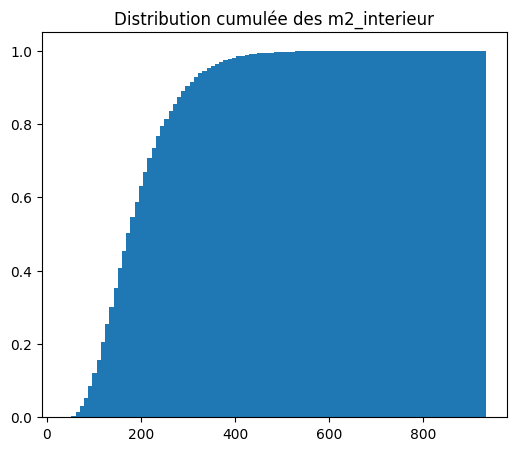

0.8466106179081662 % des maisons ont un m2_interieur > 450
0.12934328884708093 % des maisons ont un m2_interieur < 50
Perte actuelle de 1.77 %
304 lignes de données ont été supprimées
Il est encore possible d'enlever 725 lignes de données


In [65]:
# Catégorie m2_interieur

#On rend ces données entières
train['m2_interieur'] = train['m2_interieur'].astype(int)

#On trace le graphique des m2_interieur cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_interieur'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_interieur')
plt.show()

# Proportion de maisons avec m2_interieur > 450
prop_sup_450 = len(train[train['m2_interieur'] > 450])/len(train)*100
print(prop_sup_450, "% des maisons ont un m2_interieur > 450")

# Proportion de maisons avec m2_interieur < 50
prop_inf_50 = len(train[train['m2_interieur'] < 50])/len(train)*100
print(prop_inf_50, "% des maisons ont un m2_interieur < 50")

#On drop les maisons avec m2_interieur > 450
train = train.drop(train[train['m2_interieur'] > 450].index)

#On drop les maisons avec m2_interieur < 50
train = train.drop(train[train['m2_interieur'] < 50].index)

cleaning_advancement(train)

In [66]:
# Catégorie nb_etages
prop_sup_3_etages = len(train[train['nb_etages'] > 3]) / len(train) * 100
print("Proportion of properties with more than 3 floors:", prop_sup_3_etages, "%")

train = train[train['nb_etages'] <= 3]

cleaning_advancement(train)

Proportion of properties with more than 3 floors: 0.02968592293534406 %
Perte actuelle de 1.8 %
309 lignes de données ont été supprimées
Il est encore possible d'enlever 720 lignes de données


In [67]:
#Catégorie vue_note : on ne touche à rien (peu de valeurs, pas de valeurs abhérentes)

In [68]:
# Catégorie etat_note

prop_etat_note_2 = len(train[train['etat_note'] <= 2]) / len(train) * 100
print("Proportion of etat_note <= 2:", prop_etat_note_2, "%")

#On drop ces valeurs
train = train[train['etat_note'] > 2]

cleaning_advancement(train)

Proportion of etat_note <= 2: 0.8789642475353368 %
Perte actuelle de 2.67 %
457 lignes de données ont été supprimées
Il est encore possible d'enlever 572 lignes de données


In [69]:
# Catégorie design_note

prop_design_note = len(train[(train['design_note'] >= 12) | (train['design_note'] <= 5)]) / len(train) * 100
print("Proportion of properties with design_note >= 12 or <= 5:", prop_design_note, "%")

#On drop ces valeurs
train = train[(train['design_note'] < 12) & (train['design_note'] > 5)]

cleaning_advancement(train)

Proportion of properties with design_note >= 12 or <= 5: 1.2162971839424805 %
Perte actuelle de 3.85 %
660 lignes de données ont été supprimées
Il est encore possible d'enlever 369 lignes de données


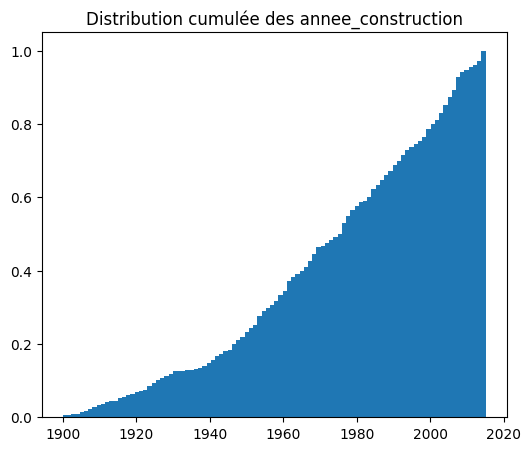

2.796142415236247 % des maisons ont été construites avant 1910


In [70]:
# Catégorie annee_construction

#On trace le graphique des annee_construction cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['annee_construction'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des annee_construction')
plt.show()

# Proportion des maisons construites avant 1910
prop_avant_1910 = len(train[train['annee_construction'] < 1910]) / len(train) * 100
print(prop_avant_1910, "% des maisons ont été construites avant 1910")

#On ne drop pas de valeurs


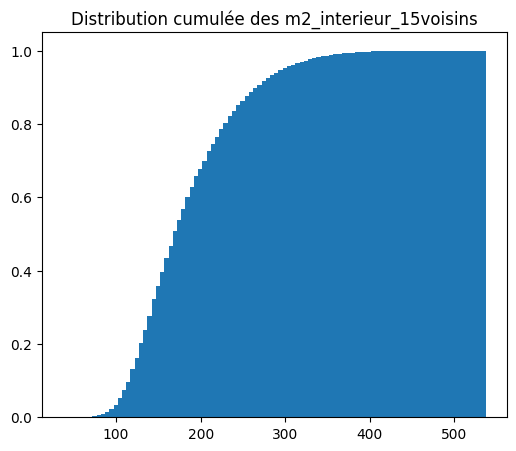

2.984169345544975 % des maisons ont un m2_interieur_15voisins > 325 ou < 75


In [71]:
# Catégorie m2_interieur_15voisins

#On rend ces données entières
train['m2_interieur_15voisins'] = train['m2_interieur_15voisins'].astype(int)

#On trace le graphique des m2_interieur_15voisins cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_interieur_15voisins'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_interieur_15voisins')
plt.show()

# Proportion de maisons avec m2_interieur_15voisins > 325 ou < 75
prop_sup_325_ou_inf_75 = (len(train[train['m2_interieur_15voisins'] > 325]) + len(train[train['m2_interieur_15voisins'] < 75])) / len(train) * 100
print(prop_sup_325_ou_inf_75, "% des maisons ont un m2_interieur_15voisins > 325 ou < 75")

# On ne drop pas de valeurs

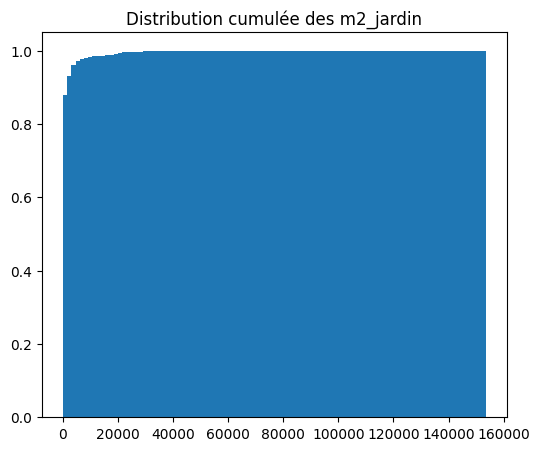

0.8673500333596167 % des maisons ont un m2_jardin > 20000
Perte actuelle de 4.68 %
803 lignes de données ont été supprimées
Il est encore possible d'enlever 226 lignes de données


In [72]:
# Catégorie m2_jardin

#On rend ces données entières
train['m2_jardin'] = train['m2_jardin'].astype(int)

#On trace le graphique des m2_jardin cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_jardin'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_jardin')
plt.show()

# Proportion de maisons avec m2_jardin > 20000
taille_data = len(train)
prop_sup_20000 = len(train[train['m2_jardin'] > 20000]) / taille_data * 100
print(prop_sup_20000, "% des maisons ont un m2_jardin > 20000")

# On drop ces valeurs
train = train[train['m2_jardin'] <= 20000]

cleaning_advancement(train)

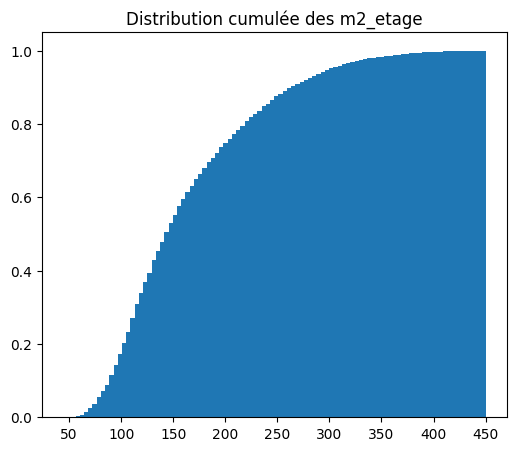

5.22515907978463 % des maisons ont un m2_etage > 300 ou < 50


In [73]:
# Catégorie m2_etage

#On rend ces données entières
train['m2_etage'] = train['m2_etage'].astype(int)

#On trace le graphique des m2_etage cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_etage'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_etage')
plt.show()

# Proportion de maisons avec m2_etage > 300 ou < 75
prop_sup_300_ou_inf_50 = (len(train[train['m2_etage'] > 300]) + len(train[train['m2_etage'] < 50])) / len(train) * 100
print(prop_sup_300_ou_inf_50, "% des maisons ont un m2_etage > 300 ou < 50")

#On ne drop pas de valeur

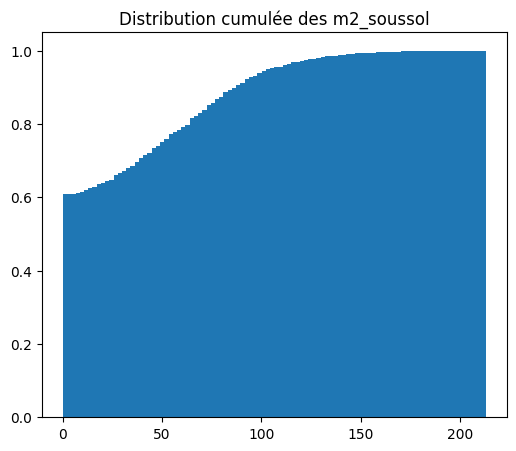

0.19579050416054822 % des maisons ont un m2_soussol > 175
Perte actuelle de 4.87 %
835 lignes de données ont été supprimées
Il est encore possible d'enlever 194 lignes de données


In [74]:
# Catégorie m2_soussol

#On rend ces données entières
train['m2_soussol'] = train['m2_soussol'].astype(int)

#On trace le graphique des m2_soussol cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_soussol'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_soussol')
plt.show()

# Proportion de maisons avec m2_soussol > 175
prop_sup_175 = len(train[train['m2_soussol'] > 175]) / len(train) * 100
print(prop_sup_175, "% des maisons ont un m2_soussol > 175")

#On drop ces valeurs
train = train[train['m2_soussol'] <= 175]

cleaning_advancement(train)

In [75]:
# Catégorie vue_mer : On ne change rien

95.70868072584601 % des maisons n'ont pas été rénovées


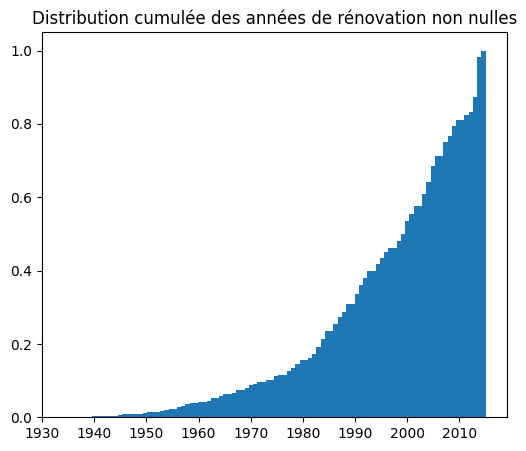

In [76]:
# Catégorie annee_renovation

# Proportion de maisons avec annee_renovation = 0
prop_annee_renovation_0 = len(train[train['annee_renovation'] == 0]) / len(train) * 100
print(prop_annee_renovation_0, "% des maisons n'ont pas été rénovées")

# On trace l'histogramme cumulé des années de rénovation non nulles
plt.subplots(figsize=(6, 5))
plt.hist(train[train['annee_renovation'] != 0]['annee_renovation'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des années de rénovation non nulles')
plt.show()

# On ne drop pas de valeurs

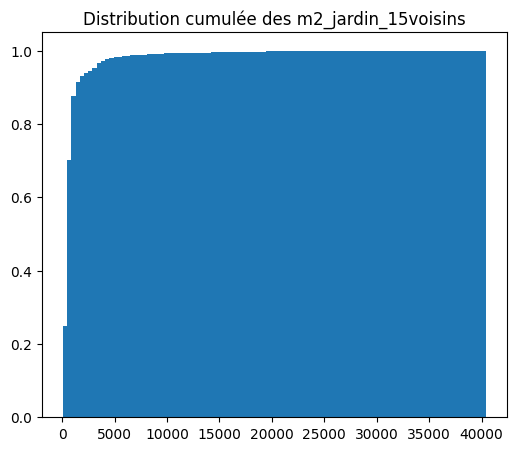

0.784698381559588 % des maisons ont un m2_jardin_15voisins > 10000
0.4413928396272682 % des maisons ont un m2_jardin_15voisins < 100
Perte actuelle de 6.04 %
1035 lignes de données ont été supprimées
Il est encore possible d'enlever -6 lignes de données


In [77]:
# Catégorie m2_jardin_15voisins

#On rend ces données entières
train['m2_jardin_15voisins'] = train['m2_jardin_15voisins'].astype(int)

#On trace le graphique des m2_jardin_15voisins cumulés
plt.subplots(figsize=(6, 5))
plt.hist(train['m2_jardin_15voisins'], bins=100, cumulative=True, density=True)
plt.title('Distribution cumulée des m2_jardin_15voisins')
plt.show()

# Proportion de maisons avec m2_jardin_15voisins > 10000
prop_sup_10000 = len(train[train['m2_jardin_15voisins'] > 10000]) / len(train) * 100
print(prop_sup_10000, "% des maisons ont un m2_jardin_15voisins > 10000")

# Proporiton de maisons avec m2_jardin_15voisins < 100
prop_inf_100 = len(train[train['m2_jardin_15voisins'] < 100]) / len(train) * 100
print(prop_inf_100, "% des maisons ont un m2_jardin_15voisins < 100")

# On drop ces valeurs
train = train[(train['m2_jardin_15voisins'] <= 10000) & (train['m2_jardin_15voisins'] >= 100)]

cleaning_advancement(train)


In [78]:
# Perte finale de données

print("Perte finale de", round((taille_initiale - len(train))/taille_initiale*100, 2), "%")

Perte finale de 6.04 %


In [79]:
# Enregistrement des données

train_cleaned_2 = train.copy()     # données nettoyées
train = raw_train   # retour aux données brutes non nettoyées

## Conclusion

On choisit de conserver le deuxième nettoyage de données car 17% de suppression de données est trop important. Avec 6% de perte, on supprime la plupart des outliers (biens d'exception ou à l'abandon / insalubres) et on entraîne le modèle sur un ensemble de logements représentatifs de la réalité, sans trop lisser la diversité existante. Avec le premier nettoyage, on conservait trop peu de biens valant cher et de biens valant peu cher.

In [80]:
# Exportation des données nettoyées

train_cleaned_2.to_csv('Data/train_cleaned.csv', index=False)
train_cleaned_2.head()

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
0,4443800785,2014-11-21T00:00:00Z,481000,2,1.00,150,360,85,65,1.0,...,0,4,7,1924,0,123,360,98117,47.6855,-122.391
3,2473003210,2015-03-13T00:00:00Z,364808,3,1.75,215,731,150,65,1.0,...,0,3,8,1967,0,184,903,98058,47.4524,-122.146
4,6743700335,2014-06-04T00:00:00Z,470000,3,2.00,167,1176,167,0,1.0,...,0,3,7,1956,1990,183,908,98033,47.6935,-122.173
5,9406510130,2015-05-05T00:00:00Z,448000,5,3.50,347,2293,256,91,2.0,...,0,3,9,1998,0,267,2417,98038,47.3832,-122.057
6,868000905,2014-07-08T00:00:00Z,950000,3,2.50,323,724,162,160,1.0,...,0,4,7,1941,1998,279,921,98177,47.7047,-122.378


## Préparation des données de test

In [81]:
# Chargement des données de test
import pandas as pd
test = pd.read_csv('Data/test_data.csv')

## Missing or zero values and percentage

# arguments qui doivent avoir une valeur non nulle
arguments1 = ["nb_chambres", "nb_sdb", "m2_interieur", "nb_etages", "vue_note", "etat_note", "design_note", "annee_construction", "m2_interieur_15voisins", "zipcode", "lat", "long"]

# arguments qui peuvent avoir une valeur nulle
arguments2 = ["m2_jardin", "m2_etage", "m2_soussol", "vue_mer", "annee_renovation", "m2_jardin_15voisins"]


for argument in arguments1:
    manquant = test[argument].isna().sum()+test[argument].isin([0]).sum()

    print("\033[1m\033[4m", argument, "\033[0m")
    print("Nombre de valeurs manquantes ou nulles pour", argument, ":", manquant)
    print("Propotion de valeurs manquantes ou nulles pour", argument, ":", manquant/len(train)*100, "%")

for argument in arguments2:
    manquant = test[argument].isna().sum()

    print("\033[1m\033[4m", argument, "\033[0m")
    print("Nombre de valeurs manquantes pour", argument, ":", manquant)
    print("Propotion de valeurs manquantes pour", argument, ":", manquant/len(train)*100, "%")


 nb_chambres 
Nombre de valeurs manquantes ou nulles pour nb_chambres : 4
Propotion de valeurs manquantes ou nulles pour nb_chambres : 0.02332769580684668 %
 nb_sdb 
Nombre de valeurs manquantes ou nulles pour nb_sdb : 3
Propotion de valeurs manquantes ou nulles pour nb_sdb : 0.017495771855135008 %
 m2_interieur 
Nombre de valeurs manquantes ou nulles pour m2_interieur : 0
Propotion de valeurs manquantes ou nulles pour m2_interieur : 0.0 %
 nb_etages 
Nombre de valeurs manquantes ou nulles pour nb_etages : 0
Propotion de valeurs manquantes ou nulles pour nb_etages : 0.0 %
 vue_note 
Nombre de valeurs manquantes ou nulles pour vue_note : 3870
Propotion de valeurs manquantes ou nulles pour vue_note : 22.569545693124162 %
 etat_note 
Nombre de valeurs manquantes ou nulles pour etat_note : 0
Propotion de valeurs manquantes ou nulles pour etat_note : 0.0 %
 design_note 
Nombre de valeurs manquantes ou nulles pour design_note : 0
Propotion de valeurs manquantes ou nulles pour design_note : 0

In [82]:
# on récupère les dans une liste les index des lignes dont le nombre de chambres est nul ou non renseigné

#index_nb_chambres = test[test['nb_chambres'].isna()].index + test[test['nb_chambres'] == 0].index

index_nb_chambres_list = test[test['nb_chambres'].isna()].index.to_list()
index_nb_chambres_list += test[test['nb_chambres'] == 0].index.to_list()

print(index_nb_chambres_list)

# On récupère les index des lignes dont le nombre de salle de bain est nul ou non renseigné

#index_nb_sdb = test[test['nb_sdb'].isna()].index + test[test['nb_sdb'] == 0].index

index_nb_sdb_list = test[test['nb_sdb'].isna()].index.to_list()
index_nb_sdb_list += test[test['nb_sdb'] == 0].index.to_list()

print(index_nb_sdb_list)

# on crée une liste contenant les index des lignes à supprimer sans doublons

index_nb_chambres_sdb = list(set(index_nb_chambres_list + index_nb_sdb_list))
index_nb_chambres_sdb.sort()

print(index_nb_chambres_sdb)

# On supprime ces lignes
print(test.shape)
test['nb_chambres'] = test['nb_chambres'].replace(0, test['nb_chambres'].mean())
test['nb_sdb'] = test['nb_sdb'].replace(0, test['nb_sdb'].mean())
print(test.shape)

# On remplace les valeurs nulles de vue_note par la moyenne des notes

# test['vue_note'] = test['vue_note'].replace(0, test['vue_note'].mean())

# On rend les m2_interieur, m2_interieur_15voisins, m2_jardin, m2_etage, m2_soussol, m2_jardin_15voisins entiers

test['m2_interieur'] = test['m2_interieur'].astype(int)
test['m2_interieur_15voisins'] = test['m2_interieur_15voisins'].astype(int)
test['m2_jardin'] = test['m2_jardin'].astype(int)
test['m2_etage'] = test['m2_etage'].astype(int)
test['m2_soussol'] = test['m2_soussol'].astype(int)
test['m2_jardin_15voisins'] = test['m2_jardin_15voisins'].astype(int)

# On exporte les données de test prêtes à être utilisées

test.to_csv('Data/test_cleaned.csv', index=False)


[549, 1881, 2215, 2915]
[1881, 2215, 2915]
[549, 1881, 2215, 2915]
(4287, 20)
(4287, 20)


In [83]:
test.head()

,id,date,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
0,3600072,2015-03-30T00:00:00Z,4.0,2.75,206,493,108,97,1.0,0,0,5,7,1951,0,143,390,98144,47.5801,-122.294
1,6200017,2014-11-12T00:00:00Z,3.0,1.00,124,1982,124,0,1.5,0,0,4,5,1945,0,124,3502,98032,47.4023,-122.273
2,7600136,2014-07-18T00:00:00Z,2.0,2.00,104,106,74,30,2.0,0,0,3,9,2007,0,125,111,98122,47.6023,-122.314
3,11200400,2014-09-23T00:00:00Z,3.0,2.50,177,416,177,0,2.0,0,0,3,8,1998,0,142,343,98007,47.6176,-122.140
4,11500890,2015-03-12T00:00:00Z,3.0,2.50,290,812,290,0,2.0,0,0,3,10,1991,0,265,836,98052,47.6954,-122.103


### Feature engineering

Date was formerly not considered, but their might be a phenomenon of seasonality or a phenomenon of inflation. We'll consider 2 extras columns :

- Number of date since the first data (inflation)

- cosin of the month (seasonality)

In [84]:
import numpy as np

train_feature_eng = train_cleaned_2.copy()
train_feature_eng['cos_month'] = np.cos((2*np.pi/12)*pd.to_datetime(train_feature_eng['date']).dt.month)
train_feature_eng['day_count'] = (pd.to_datetime(train_feature_eng['date']) - pd.to_datetime(train_feature_eng['date'].min())).dt.days

train_feature_eng.to_csv('Data/train_cleaned_feat.csv', index=False)
train_feature_eng.head()

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,cos_month,day_count
0,4443800785,2014-11-21T00:00:00Z,481000,2,1.00,150,360,85,65,1.0,...,7,1924,0,123,360,98117,47.6855,-122.391,8.660254e-01,203
3,2473003210,2015-03-13T00:00:00Z,364808,3,1.75,215,731,150,65,1.0,...,8,1967,0,184,903,98058,47.4524,-122.146,6.123234e-17,315
4,6743700335,2014-06-04T00:00:00Z,470000,3,2.00,167,1176,167,0,1.0,...,7,1956,1990,183,908,98033,47.6935,-122.173,-1.000000e+00,33
5,9406510130,2015-05-05T00:00:00Z,448000,5,3.50,347,2293,256,91,2.0,...,9,1998,0,267,2417,98038,47.3832,-122.057,-8.660254e-01,368
6,868000905,2014-07-08T00:00:00Z,950000,3,2.50,323,724,162,160,1.0,...,7,1941,1998,279,921,98177,47.7047,-122.378,-8.660254e-01,67


In [85]:
test_feature_eng = test.copy()
test_feature_eng['cos_month'] = np.cos((2*np.pi/12)*pd.to_datetime(test_feature_eng['date']).dt.month)
test_feature_eng['day_count'] = (pd.to_datetime(test_feature_eng['date']) - pd.to_datetime(test_feature_eng['date'].min())).dt.days

test_feature_eng.to_csv('Data/test_cleaned_feat.csv', index=False)
test_feature_eng.head()

,id,date,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,...,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,cos_month,day_count
0,3600072,2015-03-30T00:00:00Z,4.0,2.75,206,493,108,97,1.0,0,...,7,1951,0,143,390,98144,47.5801,-122.294,6.123234e-17,332
1,6200017,2014-11-12T00:00:00Z,3.0,1.00,124,1982,124,0,1.5,0,...,5,1945,0,124,3502,98032,47.4023,-122.273,8.660254e-01,194
2,7600136,2014-07-18T00:00:00Z,2.0,2.00,104,106,74,30,2.0,0,...,9,2007,0,125,111,98122,47.6023,-122.314,-8.660254e-01,77
3,11200400,2014-09-23T00:00:00Z,3.0,2.50,177,416,177,0,2.0,0,...,8,1998,0,142,343,98007,47.6176,-122.140,-1.836970e-16,144
4,11500890,2015-03-12T00:00:00Z,3.0,2.50,290,812,290,0,2.0,0,...,10,1991,0,265,836,98052,47.6954,-122.103,6.123234e-17,314
